<a href="https://colab.research.google.com/github/eric1645/CSE--/blob/main/cse_HW02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Second‐order one‐sided difference shceme을 사용하여 경계에서의 f’’를 유도하시오 (서술)

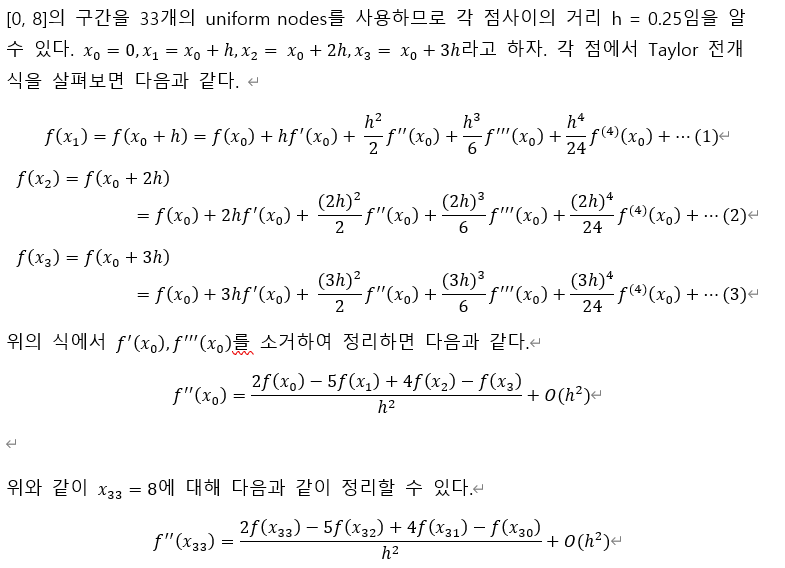

### 2. Second‐order central difference scheme을 사용하여 exact solution 과 함께 f’’를 그리시오.

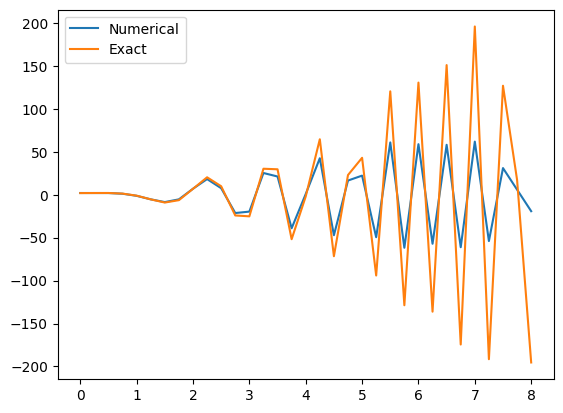

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#주어진 함수와 이계도함수
def f(x):

  return np.sin((4-x)*(4+x))

def f_dd_real(x):

  return -4*x**2*np.sin(16-x**2) - 2*np.cos(16-x**2)

# 0부터 8까지 uniform node 생성
x_points = np.linspace(0, 8, 33)
N = len(x_points)
h = x_points[1] - x_points[0]

#f'' 근사값 계산
f_dd = np.zeros(N)

#second-order one-sided difference shceme
f_dd[0] = (2*f(x_points[0])-5*f(x_points[1])+4*f(x_points[2])-f(x_points[3]))/(h**2)
f_dd[-1] = (2*f(x_points[-1])-5*f(x_points[-2])+4*f(x_points[-3])-f(x_points[-4]))/(h**2)

#second-order central difference shceme
for i in range(1, N-1):
  f_dd[i] = (f(x_points[i-1]) - 2*f(x_points[i]) + f(x_points[i+1])) /(h**2)

#실제 node별 f''값
f_dd_true = f_dd_real(x_points)

#결과 비교 시각화
plt.plot(x_points, f_dd,label='Numerical')
plt.plot(x_points, f_dd_true, label ='Exact')
plt.legend()


### 3. Second‐order central difference scheme을 사용하여 격자 개수를 바꿔가며 (33,65,129) 정확도를 분석하시오.

[np.float64(55.99024326147189), np.float64(16.149632313648144), np.float64(4.800814931915463)]


Text(0, 0.5, 'log(error)')

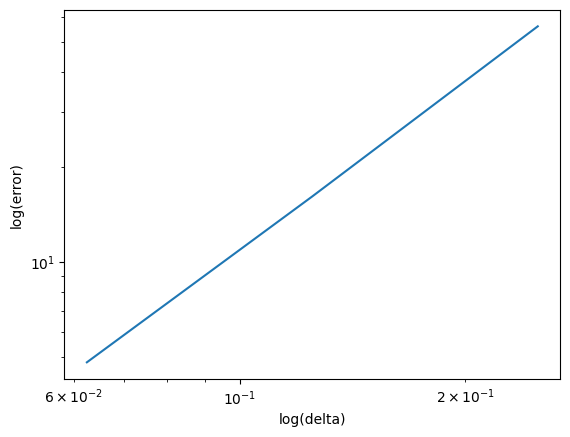

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#주어진 함수와 이계도함수
def f(x):

  return np.sin((4-x)*(4+x))

def f_dd_exact(x):

  return -4*x**2*np.sin(16-x**2) - 2*np.cos(16-x**2)

#Second-order central difference scheme
def f_dd_numerical(x, h):
  N = len(x)
  f_dd = np.zeros_like(x)
  f_dd[0] = (2*f(x[0])-5*f(x[1])+4*f(x[2])-f(x[3]))/(h**2)
  f_dd[-1] = (2*f(x[-1])-5*f(x[-2])+4*f(x[-3])-f(x[-4]))/(h**2)
  for i in range(1, N-1):
    f_dd[i] = (f(x[i-1]) - 2*f(x[i]) + f(x[i+1])) /(h**2)

  return f_dd

# error 계산 함수
def error(exact, numerical):

  return np.sqrt(np.mean((exact[2:-2] - numerical[2:-2])**2))

grid_numbers = [33, 65, 129]
errors = []
delta = []

# grid 생성
for i in grid_numbers:
  x = np.linspace(0, 8, i)
  h = x[1] - x[0]
  delta.append(h)

# error 계산
  exact = f_dd_exact(x)
  numerical = f_dd_numerical(x, h)
  errors.append(error(exact, numerical))

print(errors)

#시각화
plt.loglog(delta,errors)
plt.xlabel(r'log(delta)')
plt.ylabel(r'log(error)')